# 1-Import Libraries

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# 2- Read the Dataset

In [4]:
# Load the dataset
df = pd.read_csv('/kaggle/input/ecommerce-data/data.csv', encoding='ISO-8859-1')

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# Check basic information about the dataset
df.info()

# Summary statistics of the dataset
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### 3-Preprocessing the Data

In [8]:
# Drop rows with missing values in essential columns (if any)
df = df.dropna(subset=['Description','CustomerID'])

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a new column for total spending (Quantity * UnitPrice)
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']

# Calculate the total number of purchases (Frequency) and total spending per user
user_data = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of unique invoices (Frequency)
    'TotalSpending': 'sum',  # Total spending
}).reset_index()

# Rename columns for clarity
user_data.columns = ['UserID', 'Frequency', 'TotalSpending']

# Display the processed user data
user_data.head()

,UserID,Frequency,TotalSpending
0,12346.0,2,0.00
1,12347.0,7,4310.00
2,12348.0,4,1797.24
3,12349.0,1,1757.55
4,12350.0,1,334.40


# 4-Model

In [10]:
# Standardize the features
scaler = StandardScaler()
user_data_scaled = scaler.fit_transform(user_data[['Frequency', 'TotalSpending']])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

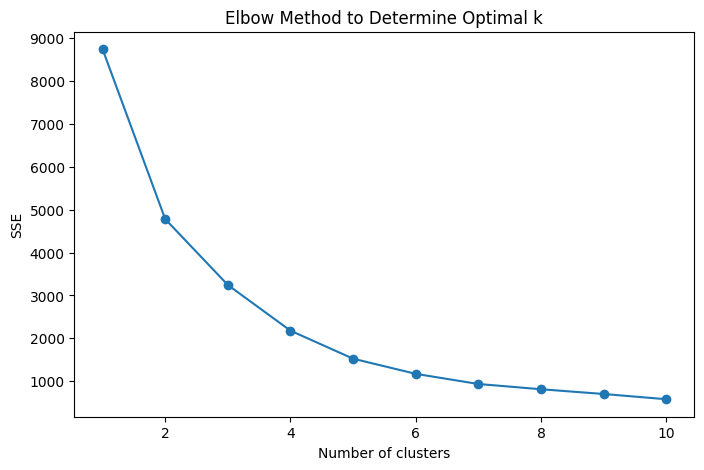

In [12]:
# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_data_scaled)
    sse.append(kmeans.inertia_)

# Plot the SSE for each value of k
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

# 6- Apply K-Means clustering 

In [16]:
# Choose the optimal number of clusters
k_optimal =  6 

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
user_data['Cluster'] = kmeans.fit_predict(user_data_scaled)

# Display the first few rows of the clustered data
user_data.head()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,UserID,Frequency,TotalSpending,Cluster
0,12346.0,2,0.00,0
1,12347.0,7,4310.00,5
2,12348.0,4,1797.24,0
3,12349.0,1,1757.55,0
4,12350.0,1,334.40,0


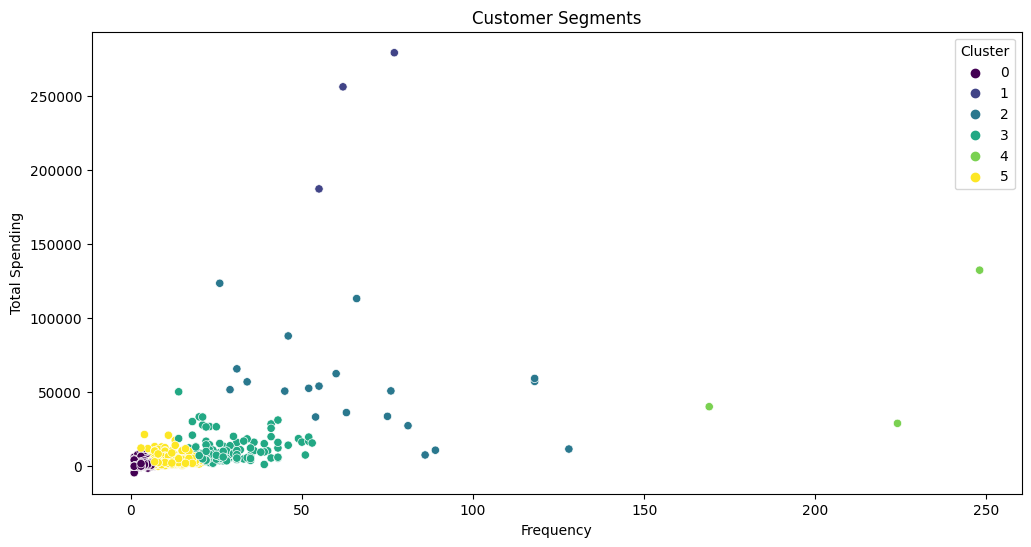

In [17]:
# Plot the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Frequency', y='TotalSpending', hue='Cluster', data=user_data, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Frequency')
plt.ylabel('Total Spending')
plt.show()